In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import MDAnalysis as mda
import MDAnalysis.analysis.msd as msd
from MDAnalysis.analysis.rdf import InterRDF
import os
os.chdir('/home/ch3859/comp-class/comp-lab-class/Week9/')

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
trajs = []
lammpstrj_files = ['Data/equil/kalj_T1.5_n360_v300_10000_1.lammpstrj', 
'Data/equil/kalj_T1_n360_v300_50000_1.lammpstrj', 
'Data/equil/kalj_T0.9_n360_v300_150000_1.lammpstrj',
'Data/equil/kalj_T0.8_n360_v300_150000_1.lammpstrj',
'Data/equil/kalj_T0.7_n360_v300_180000_1.lammpstrj',
'Data/equil/kalj_T0.65_n360_v300_350000_1.lammpstrj',
'Data/equil/kalj_T0.6_n360_v300_1000000_1.lammpstrj',
'Data/equil/kalj_T0.55_n360_v300_3000000_1.lammpstrj',
'Data/equil/kalj_T0.5_n360_v300_10000000_1.lammpstrj',
'Data/equil/kalj_T0.475_n360_v300_30000000_1.lammpstrj']

dcd_files = ['Data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd', 
'Data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd', 
'Data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd',
'Data/prod/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd',
'Data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd',
'Data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd',
'Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd',
'Data/prod/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd',
'Data/prod/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd',
'Data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd']

temperatures = [1.5, 1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]

for idx, temp in enumerate(temperatures):
    u = mda.Universe(lammpstrj_files[idx], dcd_files[idx], topology_format="LAMMPSDUMP")
    trajs.append(u)

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


### Radial distribution functions (RDF) calculation

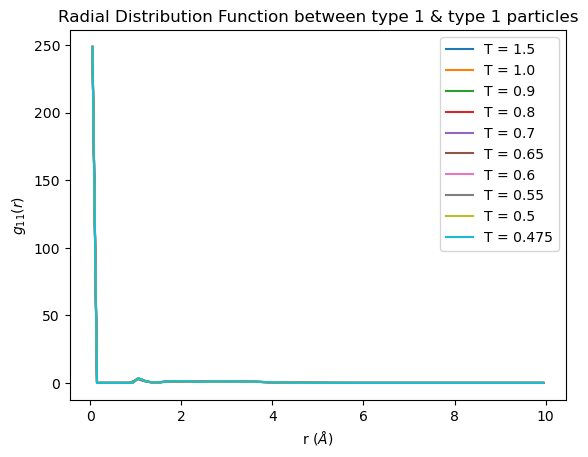

In [19]:
# calculate the radial distribution function between type 1 and type 1 particles
for i, traj in enumerate(trajs):
    rdf = InterRDF(traj.select_atoms('type 1'), traj.select_atoms('type 1'), range=(0, 10), nbins=100).run()
    plt.plot(rdf.bins, rdf.rdf, label='T = {}'.format(temperatures[i]))
plt.legend()
plt.xlabel('r ($\AA$)')
plt.ylabel('$g_{11}(r)$')
plt.title('Radial Distribution Function between type 1 & type 1 particles')
plt.savefig('Figures/3d_kalj_rdf_11.pdf', bbox_inches='tight')

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


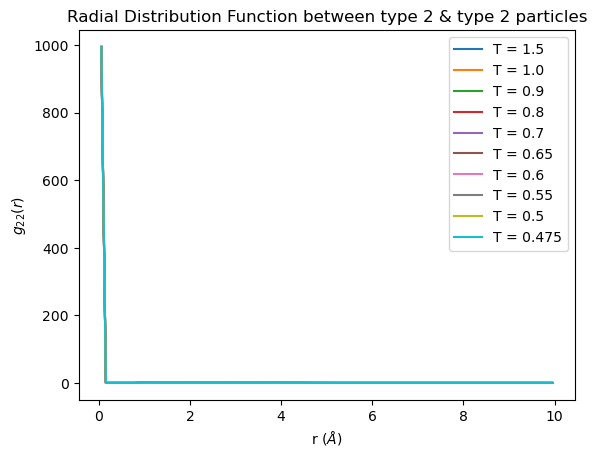

In [20]:
# calculate the radial distribution function between type 2 and type 2 particles
for i, traj in enumerate(trajs):
    rdf = InterRDF(traj.select_atoms('type 2'), traj.select_atoms('type 2'), range=(0, 10), nbins=100).run()
    plt.plot(rdf.bins, rdf.rdf, label='T = {}'.format(temperatures[i]))
plt.legend()
plt.xlabel('r ($\AA$)')
plt.ylabel('$g_{22}(r)$')
plt.title('Radial Distribution Function between type 2 & type 2 particles')
plt.savefig('Figures/3d_kalj_rdf_22.pdf', bbox_inches='tight')

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


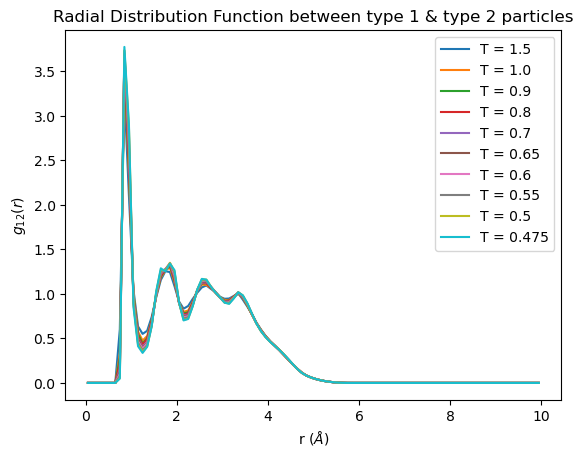

In [21]:
# calculate the radial distribution function between type 1 and type 2 particles
for i, traj in enumerate(trajs):
    rdf = InterRDF(traj.select_atoms('type 1'), traj.select_atoms('type 2'), range=(0, 10), nbins=100).run()
    plt.plot(rdf.bins, rdf.rdf, label='T = {}'.format(temperatures[i]))
plt.legend()
plt.xlabel('r ($\AA$)')
plt.ylabel('$g_{12}(r)$')
plt.title('Radial Distribution Function between type 1 & type 2 particles')
plt.savefig('Figures/3d_kalj_rdf_12.pdf', bbox_inches='tight')

### MSD calculation

In [11]:
# compute the mean-squared displacement for type 1 particles at each tempearture
msd_type1 = []
for i, traj in enumerate(trajs):
    traj_msd = msd.EinsteinMSD(traj, select='type 1')
    traj_msd.run()
    msd_type1.append(traj_msd)

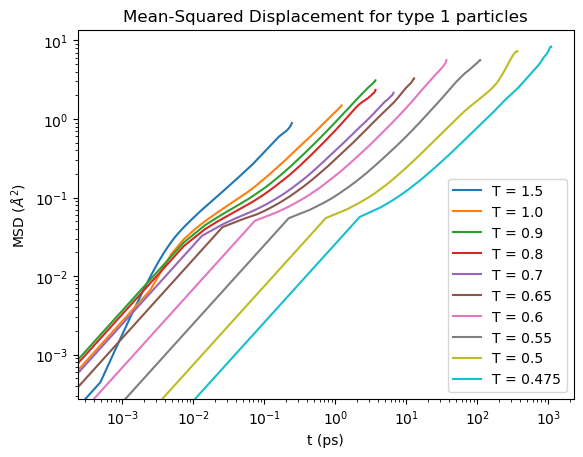

In [12]:
# show msd for each temperature in log-log plot

for i, msd_result in enumerate(msd_type1):
    plt.loglog(msd_result.times, msd_result.results.timeseries, label='T = {}'.format(temperatures[i]))
plt.legend()
plt.xlabel('t (ps)')
plt.ylabel('MSD ($\AA^2$)')
plt.title('Mean-Squared Displacement for type 1 particles')
plt.savefig('Figures/3d_kalj_msd_type1.pdf', bbox_inches='tight')
plt.show()

In [24]:
# Find the time where MSD = 1 at each temperature
msd_1 = []
for i, msd_result in enumerate(msd_type1):
    last_time_msd_lt_1 = np.where(msd_result.results.timeseries < 1)[0][-1]
    msd_1.append(msd_result.times[last_time_msd_lt_1])
    print('T = {}, idx = {}, msd = {}, time = {}'.format(temperatures[i], last_time_msd_lt_1, msd_result.results.timeseries[last_time_msd_lt_1], msd_result.times[last_time_msd_lt_1]))

T = 1.5, idx = 500, msd = 0.8865619099002289, time = 0.2444410616103269
T = 1.0, idx = 324, msd = 0.9991901600705866, time = 0.7919890396174591
T = 0.9, idx = 150, msd = 0.9990565079076323, time = 1.0999847772464708
T = 0.8, idx = 191, msd = 0.9988006339646813, time = 1.400647283027173
T = 0.7, idx = 222, msd = 0.9998870353972161, time = 2.930359332871691
T = 0.65, idx = 148, msd = 0.9955295151317176, time = 3.7986139500188587
T = 0.6, idx = 97, msd = 0.9993205087743023, time = 7.113234616830681
T = 0.55, idx = 78, msd = 0.9991414987039146, time = 17.159761859158554
T = 0.5, idx = 68, msd = 0.9894459948982468, time = 49.865974633452204
T = 0.475, idx = 60, msd = 0.9878194393256212, time = 131.99816814737346


Note that for T=1.5, the simulation has not reached the time where MSD = 1. Here we abandon this point.

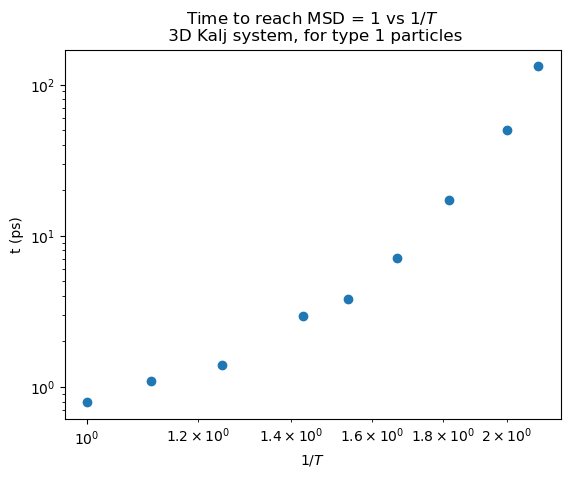

In [26]:
# Make a plot of time (MSD=1) vs $1/T$ in the log-log manner
plt.loglog(1/np.array(temperatures[1:]), msd_1[1:], 'o')
plt.xlabel('$1/T$')
plt.ylabel('t (ps)')
plt.title('Time to reach MSD = 1 vs $1/T$\n 3D Kalj system, for type 1 particles')
plt.savefig('Figures/3d_kalj_time_msd1_temp.pdf', bbox_inches='tight')
plt.show()